Course: https://www.udemy.com/course/time-series-analysis/

# Section 3: Time Series Basics

- The data for this course is available at: https://docs.google.com/document/d/1SiG1V325FQ4bqhUFEoXGhkAK89RSS0tplcJBCuivn_s/edit?usp=sharing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,r2_score,mean_squared_error

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2022-10-12 13:39:51--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 2606:4700:3030::ac43:d5a6, 2606:4700:3031::6815:17d2, 104.21.23.210, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|2606:4700:3030::ac43:d5a6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2022-10-12 13:39:52 (25.7 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



# Power, Log, and Box-Cox Transformations in Code
- Use airline_passengers.csv data to explore transformations discussed in this section

In [5]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


- See what original data looks like:

<AxesSubplot:xlabel='Month'>

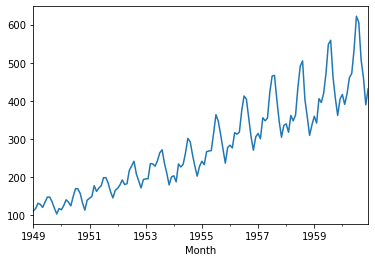

In [6]:
df['Passengers'].plot()

- Above time series has important characteristics:
    - Trend (updward to the right)
    - Seasonality (repeating pattern in time)
    - Amplitude is increasing over time
- Would be nice to make things not change over time. Explore transforms
- Create sqrt, log, and boxcox transformation of 'Passengers' data:

In [8]:
df['SqrtPassengers'] = np.sqrt(df['Passengers'])
df['LogPassengers'] = np.log(df['Passengers'])
data, lam = boxcox(df['Passengers'])
df['BoxCoxPassengers'] = data

- Plot to see changes:

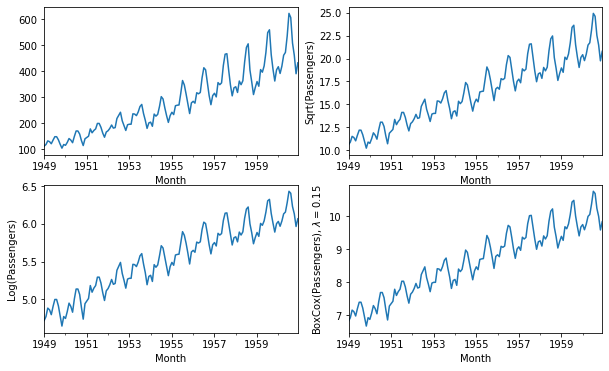

In [25]:
plt.figure(figsize=(10,6))
plt.subplot(221)
df['Passengers'].plot()
plt.subplot(222)
df['SqrtPassengers'].plot()
plt.ylabel('Sqrt(Passengers)')
plt.subplot(223)
df['LogPassengers'].plot()
plt.ylabel('Log(Passengers)')
plt.subplot(224)
df['BoxCoxPassengers'].plot()
plt.ylabel('BoxCox(Passengers), $\lambda={:0.2f}$'.format(lam))
plt.show()

- Sqrt: ts has been squashed down slightly but amplitude of seasonal pattern still increases over time
- Log: Does pretty good job at squashing down data, making it look more uniform over time
- Box-Cox: Something in between sqrt and log transforms

- Now look at histograms to check distributions
    - Keep in mind this is not the correct technique since it is changing in time

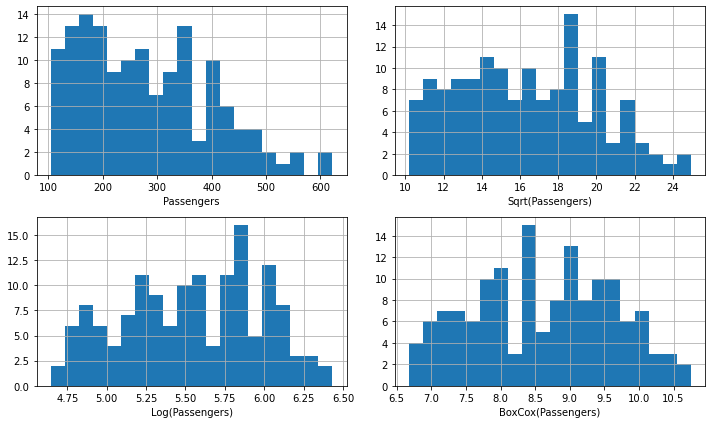

In [26]:
plt.figure(figsize=(10,6))
plt.subplot(221)
df['Passengers'].hist(bins=20)
plt.xlabel('Passengers')
plt.subplot(222)
df['SqrtPassengers'].hist(bins=20)
plt.xlabel('Sqrt(Passengers)')
plt.subplot(223)
df['LogPassengers'].hist(bins=20)
plt.xlabel('Log(Passengers)')
plt.subplot(224)
df['BoxCoxPassengers'].hist(bins=20)
plt.xlabel('BoxCox(Passengers)')
plt.tight_layout()
plt.show()

- Raw: most values concentrated in lower 100's
- Sqrt: distrib has been pushed further to right, more flat than before and less concentrated on the lower values
- Log: more evenly spaced out in the center instead of skewed to one side
- Box-Cox: largest peak is closest to the center

# Price Simulations in Code
- Look at simple example of simulating stock prices assuming log returns come from normal distribution
- Applications:
    - How is this related to real stock prices?
    - Trading simulations
    - Black-Scholes formula
    - Evaluating ARIMA model selection rules of thumb

In [3]:
T = 1000 # number of time steps
P0 = 10 # initial price
mu = 0.001 # drift term

- Run simulation:

In [4]:
last_p = np.log(P0) # last log price, will be updated in loop
prices = np.zeros(T) # initialize prices array

for t in range(T):
    r = 0.01*np.random.randn() # sample log return from normal distribution with std = 0.01
    p = last_p + mu + r # log price = last log price + drift + random noise
    prices[t] = np.exp(p) # exponentiate log price to get actual price
    last_p = p # reset last log price to be new log price

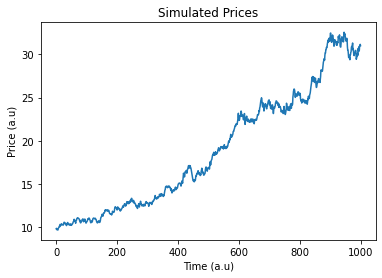

In [5]:
plt.figure()
plt.plot(prices)
plt.xlabel('Time (a.u)')
plt.ylabel('Price (a.u)')
plt.title('Simulated Prices')
plt.show()

# Naive Forecast and Forecasting Metrics in Code

In [4]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

--2022-10-14 13:30:54--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 2606:4700:3031::6815:17d2, 2606:4700:3030::ac43:d5a6, 172.67.213.166, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|2606:4700:3031::6815:17d2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 246.03K   868KB/s    in 0.3s    

2022-10-14 13:30:54 (868 KB/s) - ‘SPY.csv’ saved [251935/251935]



In [6]:
df = pd.read_csv('SPY.csv',index_col='Date',parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


- Create prediction using naive forecast (with zero noise)
    - i.e the stock close prediction is just the previous stock close value

In [7]:
df['ClosePrediction'] = df['Close'].shift(1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,ClosePrediction
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,113.330002
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,113.629997
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,113.709999
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,114.190002


- Rename arguments for sklearn:

In [9]:
y_true = df.iloc[1:]['Close']
y_pred = df.iloc[1:]['ClosePrediction']

- Now look at different metrics:
    - Sum of squared errors: $SSE = \sum_i^N(y_i-\hat{y}_i)^2$
    - Mean squared error: $MSE = \frac{1}{N}\sum_i^N (y_i-\hat{y}_i)^2$
    - Root MSE: $RMSE = \sqrt{\frac{1}{N}\sum_i^N (y_i-\hat{y}_i)^2}$
    - Mean absolute error: $MAE = \frac{1}{N}\sum_i^N |y_i-\hat{y}_i|$
    - $R^2 = 1-\frac{MSE}{Var(Y)}$
    - Mean Absolute Percentage Error: $MAPE = \frac{1}{N}\sum_i^N\left|\frac{y_i-\hat{y}_i}{y_i} \right|$
    - Symmetric MAPE: $sMAPE = \frac{1}{N}\sum_i^N\left|\frac{y_i-\hat{y}_i}{1/2(|y_i|-|\hat{y}_i|)} \right|$

In [25]:
def sMAPE(y_true,y_pred):
    n = len(y_true)
    num = np.abs(y_true-y_pred)
    denom = 0.5*(np.abs(y_true)+np.abs(y_pred))
    ratio = num/denom
    return ratio.mean()

In [26]:
print('SSE = ',(y_true-y_pred).dot(y_true-y_pred))
print('MSE (sklearn) = ',mean_squared_error(y_true,y_pred))
print('MSE (local) = ',(y_true-y_pred).dot(y_true-y_pred)/len(y_true))
print('RMSE (sklearn) = ',mean_squared_error(y_true,y_pred,squared=False))
print('RMSE (local) = ',np.sqrt((y_true-y_pred).dot(y_true-y_pred)/len(y_true)))
print('MAE = ',mean_absolute_error(y_true,y_pred))
print('R^2 = ',r2_score(y_true,y_pred))
print('MAPE = ',mean_absolute_percentage_error(y_true,y_pred))
print('sMAPE = ',sMAPE(y_true,y_pred))

SSE =  6330.3742894926045
MSE (sklearn) =  2.798573956451196
MSE (local) =  2.7985739564511958
RMSE (sklearn) =  1.672893886787562
RMSE (local) =  1.6728938867875618
MAE =  1.1457559803120336
R^2 =  0.9989603259063914
MAPE =  0.006494073151422373
sMAPE =  0.006491365814068418


 - $r^2$ scored is quite good:
     - Our naive forecast gives an excellent $r^2$. Makes sense since stock values don't vary that wildly from day to day
     - Thus, predicting the last value in the series would then give us good predictors
     - This are also bad predictions in a sense because they're the easiest predictions possible
     - The high $r^2$ value here does not necessarily imply that our model is good